# 超音波ガイド波実験の素材収集用コード

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import MaxNLocator
import os

In [17]:
# ファイルの読込み
input_filepath = './source/csv/【実験】251005_周波数特性確認/欠陥なし/単体250差動.csv'
df = pd.read_csv(input_filepath, encoding='cp932')
# df.head(10)
# df.columns

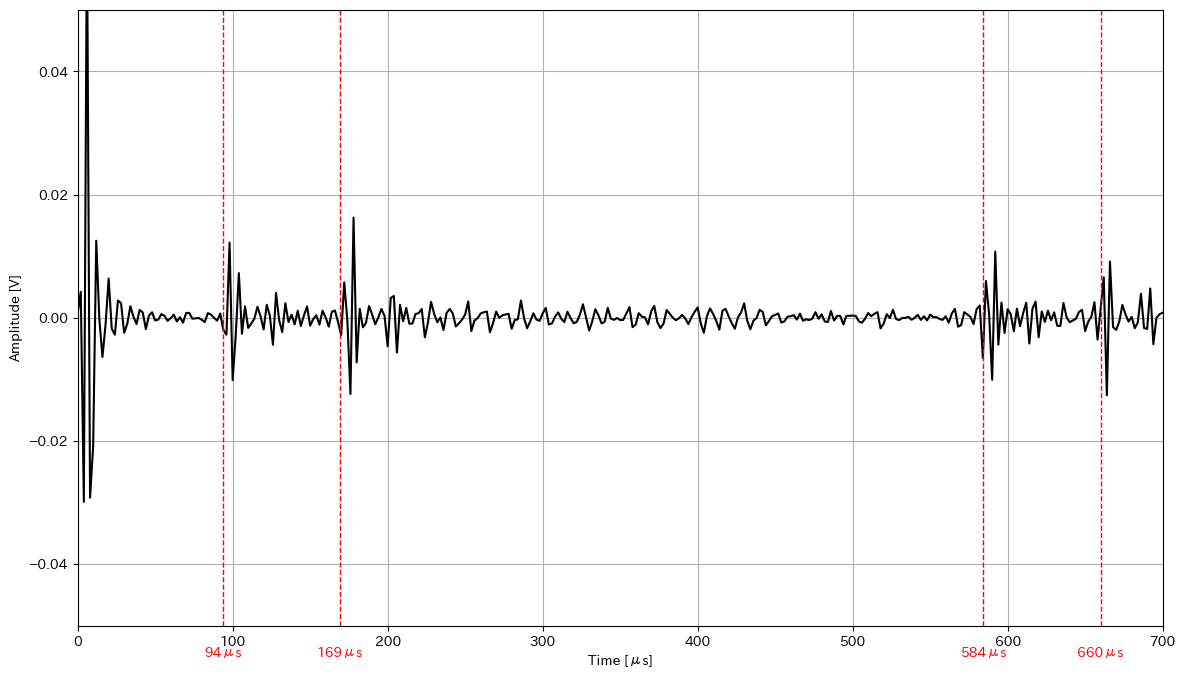

In [18]:
plt.figure(figsize=(14, 8))
plt.plot(df['時間[μs]'], df[' 加算平均値[V]'], label='振幅', color='black')
# 縦線の位置
x_lines = [94, 169, 584, 660]

for x in x_lines:
    plt.axvline(x=x, color='red', linestyle='--', linewidth=1) 
    plt.text(x, -0.055, f'{x}μs', color='red', fontsize=10, ha='center')

# x_lines_defect = [320, 396]

# 欠陥を有する場合は使用
# for x in x_lines_defect:
#     plt.axvline(x=x, color='blue', linestyle='--', linewidth=1) 
#     plt.text(x, -0.055, f'{x}μs', color='blue', fontsize=10, ha='center')

plt.grid(True)
plt.xlabel('Time [μs]')
plt.ylabel('Amplitude [V]')
# plt.title('xxx')
plt.xlim(0, 700)
plt.ylim(-0.05, 0.05)
plt.show()

## 以下製作途中

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import os
import glob

# 1. すべてのCSVファイルを再帰的に検索
# ルートディレクトリ
source_root = './source/csv'
output_root = './output'

# globを使用してsource_root配下の全csvファイルのパスを取得
input_filepaths = glob.glob(os.path.join(source_root, '**', '*.csv'), recursive=True)

# 処理するファイルが見つからなかった場合のエラーハンドリング
if not input_filepaths:
    print(f"'{source_root}'ディレクトリ内にCSVファイルが見つかりませんでした。")
else:
    print(f"{len(input_filepaths)}個のCSVファイルを処理します。")

# 取得したファイルパスを一つずつ処理
for input_filepath in input_filepaths:
    try:
        # --- 3. 保存先パスの準備 ---
        # input_filepathからsource_root部分を削除し、先頭の'/'も取り除く
        relative_path = os.path.relpath(input_filepath, source_root)
        
        # .csvを.pngに置換
        output_filename = os.path.splitext(relative_path)[0] + '.png'
        
        # 出力先のフルパスを生成
        output_filepath = os.path.join(output_root, output_filename)
        
        # 出力先のディレクトリが存在しない場合は作成
        output_dir = os.path.dirname(output_filepath)
        os.makedirs(output_dir, exist_ok=True)

        # --- 2. 添付した処理を行い波形画像を作成する ---
        # ファイルの読込み
        df = pd.read_csv(input_filepath, encoding='cp932')

        # グラフ描画
        plt.figure(figsize=(14, 8))
        plt.plot(df['時間[μs]'], df[' 加算平均値[V]'], label='振幅', color='black')
        
        # 共通の縦線を描画
        x_lines = [94, 169, 584, 660]
        for x in x_lines:
            plt.axvline(x=x, color='red', linestyle='--', linewidth=1) 
            plt.text(x, -0.055, f'{x}μs', color='red', fontsize=10, ha='center')

        # フォルダ名に'非貫通'または'貫通'が含まれるかチェック
        # os.path.dirnameで親ディレクトリのパスを取得し、os.path.basenameでフォルダ名を取得
        parent_folder_name = os.path.basename(os.path.dirname(input_filepath))
        if parent_folder_name in ['非貫通', '貫通']:
            # 欠陥を示す縦線を追加
            x_lines_defect = [320, 396]
            for x in x_lines_defect:
                plt.axvline(x=x, color='blue', linestyle='--', linewidth=1) 
                plt.text(x, -0.055, f'{x}μs', color='blue', fontsize=10, ha='center')

        # グラフの各種設定
        plt.grid(True)
        plt.xlabel('Time [μs]')
        plt.ylabel('Amplitude [V]')
        
        # ファイル名をタイトルとして設定
        # title = os.path.splitext(os.path.basename(input_filepath))[0]
        # plt.title(title)
        
        plt.xlim(0, 700)
        plt.ylim(-0.05, 0.05)
        
        # グラフをファイルとして保存
        plt.savefig(output_filepath)
        
        # メモリ解放のため、プロットを閉じる
        plt.close()

        print(f"'{output_filepath}' に画像を保存しました。")

    except Exception as e:
        print(f"ファイル '{input_filepath}' の処理中にエラーが発生しました: {e}")

print("すべての処理が完了しました。")

83個のCSVファイルを処理します。
'./output/【実験】251010_検出側をリッツ線に変えて計測/欠陥なし/単体250kHz欠陥なし.png' に画像を保存しました。
'./output/【実験】251010_検出側をリッツ線に変えて計測/貫通/単体250kHz貫通欠陥.png' に画像を保存しました。
'./output/【実験】251010_検出側をリッツ線に変えて計測/非貫通/単体250kHz非貫通.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono150kHz_2times.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono200kHz_3times.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono200Khz_1times.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono250kHz_2times.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono250kHz_1times.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono150kHz_3times.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono200kHz_2times.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono250kHz_3times.png' に画像を保存しました。
'./output/【実験】251005_環境ノイズの調査/Mono150kHz_1times.png' に画像を保存しました。
'./output/【実験】251005_周波数特性確認/欠陥なし/複数150差動.png' に画像を保存しました。
'./output/【実験】251005_周波数特性確認/欠陥なし/単体50単一.png' に画像を保存しました。
'./output/【実験】251005_周波数特性確認/欠陥なし/単体150差動.png' に画像を保存しました。
'./output/【

In [7]:
velocity = [[2770, 5370, 2770, 3090, 4890],
            [3000, 5360, 3000, 3170, 5120],
            [3120, 5310, 3120, 3190, 5170],] # 伝搬速度

route = [500, 900, 1700, 2100, 3100, 3500]  # 伝搬距離

# 伝搬時間の計算
time = []
for v in velocity:
    t = [d / vi * 1e3 for d, vi in zip(route, v)]  # μsに変換
    time.append(t) 

df = pd.DataFrame(time, columns=['1', '2', '3', '4', '5'], index=['条件1', '条件2', '条件3'])
print(df) 

              1           2           3           4           5
条件1  180.505415  167.597765  613.718412  679.611650  633.946830
条件2  166.666667  167.910448  566.666667  662.460568  605.468750
条件3  160.256410  169.491525  544.871795  658.307210  599.613153


In [ ]:
# 伝搬速度と伝搬距離の定義
# 伝播速度
velocity = [[2770, 5370, 2770, 3090, 4890],
            [3000, 5360, 3000, 3170, 5120],
            [3120, 5310, 3120, 3190, 5170],]

# 伝播距離
route = [500, 900, 1700, 2100, 3100, 3500]
